<center>
<h1>CSCI3151 - Foundations of Machine Learning</h1>
<h2>Assignment 2</h2>

<b> Due on: Monday March 4, 2024 at 23:59 ADT</b>

<b> Can be completed in groups of 2 or 3</b>

<small>(One submission per group, and you must list all group members at the top of that submission)</small>
</center>

[Assignment Submission Instructions](https://docs.google.com/document/d/1iHzvkaZzNyZJ54Qw4eXJYOC2vzQUPliMyEBbZVRiS4Q/edit?usp=sharing)

### Group Members:

1. Mark Jerald Santiago
2.
3.

## **1. Multi-class classification using neural networks**

In this question you will experiment with a neural network in the context of image classification, where a image can belong to one out of several possible categories. The main goal for you is to try different hyperparameters in a systematic manner so that you can propose a network configuration that is properly justified. You will experiment with the [MNIST digits](https://keras.io/api/datasets/mnist/), which can be loaded directly from Keras:

```python
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
```

In [146]:
import tensorflow as tf
from keras.datasets import mnist
from keras import layers, models

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# normalize values
X_train = X_train.reshape(60000, 784) / 255
X_test = X_test.reshape(10000, 784) / 255


In [147]:
print(len(X_train), len(y_train))

60000 60000


Build a sequential model using `keras.models.Sequential` and add dense layers and experiment with it. Compile and train the model.

After building a working model, follow instructions as per Q1.a and Q1.b

In [148]:
import numpy as np
import keras

In [149]:
# your code here
# Use Keras
def seq_model():
    model = keras.Sequential()
    model.add(keras.Input(shape=(784,)))
    model.add(layers.Dense(64, activation="relu", name="dense_1"))
    model.add(layers.Dense(64, activation="relu", name="dense_2"))
    model.add(layers.Dense(10, activation="softmax", name="predictions"))

    model.compile("SGD", "sparse_categorical_crossentropy", "sparse_categorical_accuracy")
    return model

In [150]:
seq0 = seq_model()
seq0.fit(x = X_train, y = y_train, batch_size = 128, epochs = 10)

Epoch 1/10
469/469 [==============================] - 1s 1ms/step - loss: 1.3939 - sparse_categorical_accuracy: 0.6303
Epoch 2/10
469/469 [==============================] - 1s 1ms/step - loss: 0.5604 - sparse_categorical_accuracy: 0.8523
Epoch 3/10
469/469 [==============================] - 1s 1ms/step - loss: 0.4204 - sparse_categorical_accuracy: 0.8831
Epoch 4/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3643 - sparse_categorical_accuracy: 0.8969
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3322 - sparse_categorical_accuracy: 0.9049
Epoch 6/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3100 - sparse_categorical_accuracy: 0.9113
Epoch 7/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2929 - sparse_categorical_accuracy: 0.9159
Epoch 8/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2785 - sparse_categorical_accuracy: 0.9202
Epoch 9/10
469/469 [============================

In [151]:
# evaluate your model by running the code below
score = seq0.evaluate(X_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.2474 - sparse_categorical_accuracy: 0.9273
Test score: 0.24740087985992432
Test accuracy: 0.927299976348877


a) As we load the data from the built-in keras function, it splits them into two subsets; however, it is recommended to split the data into three subsets such as:

```
70% train, 15% val, 15% test
```

Use the mentioned ratios to split the data and train the model using these portions. For each one of your experiments, train the model and report the loss and accuracy of model on the training and validation set. (for more information check this [link](https://scikit-learn.org/stable/modules/learning_curve.html#:~:text=2.-,Learning%20curve,error%20or%20a%20bias%20error.))  

> Note: since the dataset is already split into train and test sets for you, you should concatenate and shuffle the two sets before splitting them again to achieve the ratios you want


In [152]:
# your code here
# shuffle
X_combined = np.append(X_train, X_test, axis=0)
Y_combined = np.append(y_train, y_test)

indices = np.arange(X_combined.shape[0])
np.random.shuffle(indices)

X_combined = X_combined[indices]
Y_combined = Y_combined[indices]

size = X_combined.shape[0]
# sets
train_set_split = int(size * .7)
valid_set_split = int(size * .15)
test_set_split = int(size * .15)

train_set = X_combined[:train_set_split]
train_label = Y_combined[:train_set_split]

valid_set = X_combined[train_set_split:valid_set_split + train_set_split]
valid_label = Y_combined[train_set_split:valid_set_split + train_set_split]
# 
test_set = X_combined[-test_set_split:]
test_label = Y_combined[-test_set_split:]

In [153]:
seq1 = seq_model()
seq1.fit(x = train_set, y = train_label, batch_size = 128, epochs = 10, validation_data = (valid_set, valid_label), shuffle = True)
#print(train_set, "\n", len(train_label))

Epoch 1/10
383/383 [==============================] - 1s 2ms/step - loss: 1.5773 - sparse_categorical_accuracy: 0.5825 - val_loss: 0.8957 - val_sparse_categorical_accuracy: 0.8034
Epoch 2/10
383/383 [==============================] - 1s 2ms/step - loss: 0.6472 - sparse_categorical_accuracy: 0.8460 - val_loss: 0.5229 - val_sparse_categorical_accuracy: 0.8625
Epoch 3/10
383/383 [==============================] - 1s 2ms/step - loss: 0.4515 - sparse_categorical_accuracy: 0.8819 - val_loss: 0.4249 - val_sparse_categorical_accuracy: 0.8821
Epoch 4/10
383/383 [==============================] - 1s 2ms/step - loss: 0.3846 - sparse_categorical_accuracy: 0.8943 - val_loss: 0.3801 - val_sparse_categorical_accuracy: 0.8930
Epoch 5/10
383/383 [==============================] - 1s 1ms/step - loss: 0.3495 - sparse_categorical_accuracy: 0.9021 - val_loss: 0.3529 - val_sparse_categorical_accuracy: 0.8973
Epoch 6/10
383/383 [==============================] - 1s 1ms/step - loss: 0.3262 - sparse_categorica

In [154]:
score = seq1.evaluate(test_set, test_label)
print('Test score:', score[0])
print('Test accuracy:', score[1])

329/329 [==============================] - 0s 1ms/step - loss: 0.2726 - sparse_categorical_accuracy: 0.9229
Test score: 0.27262622117996216
Test accuracy: 0.9228571653366089


In [155]:
seq1.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 predictions (Dense)         (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


b) Experiment with different hyperparameters and report your best accuracy found. The most important hyperparameters that you need to experiment with in this question part are:

* number of layers
* nodes per hidden layer
* learning rate
* number of epochs

Perform at least three experiments, being sure to vary only one hyperparameter at a time. To select the best choice of hyperparameters, draw the loss and accuracy curve.

In [167]:
# Sequential Model
def create_model(n_layer, n_nodes, activation_f):
    model = keras.Sequential()
    model.add(keras.Input(shape=(784,)))
    for _ in range(n_layer):
        model.add(layers.Dense(n_nodes, activation_f))
    model.add(layers.Dense(10, activation='softmax', name='output'))

    model.compile("SGD", "sparse_categorical_crossentropy", "sparse_categorical_accuracy")
    return model


In [193]:
# Train Model -- # of Layers
seq_0 = create_model(3, 64, "relu")
seq_0_hist = seq_0.fit(x = train_set, y = train_label, batch_size = 128, epochs = 10, validation_data = (valid_set, valid_label), shuffle = True)

seq_1 = create_model(5, 64, "relu")
seq_1_hist = seq_1.fit(x = train_set, y = train_label, batch_size = 128, epochs = 10, validation_data = (valid_set, valid_label), shuffle = True)

seq_2 = create_model(10, 64, "relu")
seq_2_hist = seq_2.fit(x = train_set, y = train_label, batch_size = 128, epochs = 10, validation_data = (valid_set, valid_label), shuffle = True)

seq_3 = create_model(15, 64, "relu")
seq_3_hist = seq_3.fit(x = train_set, y = train_label, batch_size = 128, epochs = 10, validation_data = (valid_set, valid_label), shuffle = True)

Epoch 1/10
383/383 [==============================] - 1s 2ms/step - loss: 1.7634 - sparse_categorical_accuracy: 0.4682 - val_loss: 1.0420 - val_sparse_categorical_accuracy: 0.7675
Epoch 2/10
383/383 [==============================] - 1s 1ms/step - loss: 0.6808 - sparse_categorical_accuracy: 0.8288 - val_loss: 0.5156 - val_sparse_categorical_accuracy: 0.8615
Epoch 3/10
383/383 [==============================] - 1s 1ms/step - loss: 0.4305 - sparse_categorical_accuracy: 0.8803 - val_loss: 0.4057 - val_sparse_categorical_accuracy: 0.8850
Epoch 4/10
383/383 [==============================] - 1s 1ms/step - loss: 0.3614 - sparse_categorical_accuracy: 0.8971 - val_loss: 0.3618 - val_sparse_categorical_accuracy: 0.8954
Epoch 5/10
383/383 [==============================] - 1s 1ms/step - loss: 0.3269 - sparse_categorical_accuracy: 0.9064 - val_loss: 0.3391 - val_sparse_categorical_accuracy: 0.9021
Epoch 6/10
383/383 [==============================] - 1s 1ms/step - loss: 0.3042 - sparse_categorica

In [205]:
import matplotlib.pyplot as plt
from keras.callbacks import History
history = History()

# Check validation error for each model
def graph_accVloss(model, label, title):
    fig,axs = plt.subplots(2)
    fig.suptitle(title)
    axs[0].set_title('Loss Graph')
    axs[1].set_title('Accuracy Graph')
    for i in model:
        axs[0].plot(i.history['val_loss'])
        axs[1].plot(i.history['val_sparse_categorical_accuracy'])

    axs[0].legend(label, loc='upper right')
    axs[1].legend(label, loc='upper right')
    plt.show()

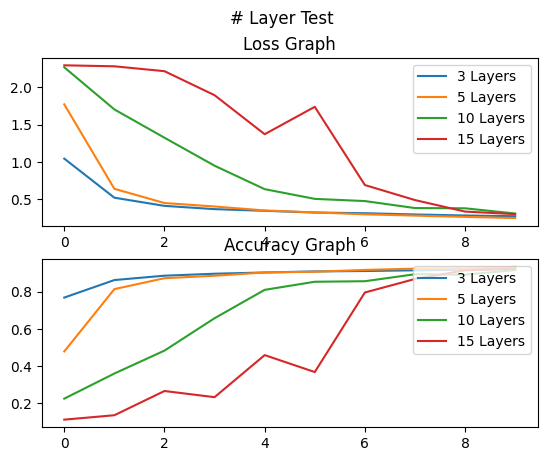

In [207]:
graph_accVloss([seq_0_hist, seq_1_hist, seq_2_hist, seq_3_hist], ["3 Layers", "5 Layers", "10 Layers", "15 Layers"], "# Layer Test")

Comparing the 4 models, the 5 Layer model seems to perform the best and 10 Layers seems to perform the worst, I will be using 5 Layers for the next Experiments

In [209]:
# Change # of nodes per layer
seq_0_n = create_model(5, 32, "relu")
seq_0_n_hist = seq_0_n.fit(x = train_set, y = train_label, batch_size = 128, epochs = 10, validation_data = (valid_set, valid_label), shuffle = True)

seq_1_n = create_model(5, 64, "relu")
seq_1_n_hist = seq_1_n.fit(x = train_set, y = train_label, batch_size = 128, epochs = 10, validation_data = (valid_set, valid_label), shuffle = True)

seq_2_n = create_model(5, 128, "relu")
seq_2_n_hist = seq_2_n.fit(x = train_set, y = train_label, batch_size = 128, epochs = 10, validation_data = (valid_set, valid_label), shuffle = True)

Epoch 1/10
383/383 [==============================] - 1s 2ms/step - loss: 2.1615 - sparse_categorical_accuracy: 0.2293 - val_loss: 1.9092 - val_sparse_categorical_accuracy: 0.4024
Epoch 2/10
383/383 [==============================] - 1s 1ms/step - loss: 1.4116 - sparse_categorical_accuracy: 0.5823 - val_loss: 0.9329 - val_sparse_categorical_accuracy: 0.7426
Epoch 3/10
383/383 [==============================] - 1s 1ms/step - loss: 0.6803 - sparse_categorical_accuracy: 0.8057 - val_loss: 0.5583 - val_sparse_categorical_accuracy: 0.8355
Epoch 4/10
383/383 [==============================] - 1s 1ms/step - loss: 0.4761 - sparse_categorical_accuracy: 0.8618 - val_loss: 0.4488 - val_sparse_categorical_accuracy: 0.8662
Epoch 5/10
383/383 [==============================] - 1s 1ms/step - loss: 0.3997 - sparse_categorical_accuracy: 0.8829 - val_loss: 0.3994 - val_sparse_categorical_accuracy: 0.8814
Epoch 6/10
383/383 [==============================] - 1s 1ms/step - loss: 0.3597 - sparse_categorica

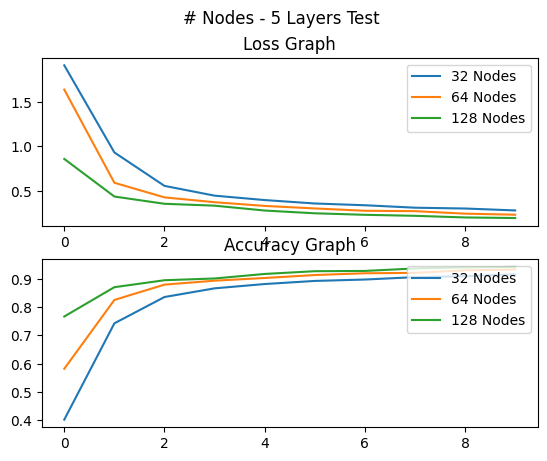

In [210]:
graph_accVloss([seq_0_n_hist, seq_1_n_hist, seq_2_n_hist], ["32 Nodes", "64 Nodes", "128 Nodes"], "# Nodes - 5 Layers Test")

Comparing the models with different # nodes, 128 nodes performs the best which makes sense since having a higher number of nodes will allow us to learn more features, although there will be a point where if our NN is sufficiently large it will just store the entire data set instead of learning which will result in overfitting

In [213]:
# change epoch
seq_epoch_0 = create_model(5, 128, "relu")
seq_0_e_hist = seq_epoch_0.fit(x = train_set, y = train_label, batch_size = 128, epochs = 10, validation_data = (valid_set, valid_label), shuffle = True)

seq_epoch_1 = create_model(5, 128, "relu")
seq_1_e_hist = seq_epoch_1.fit(x = train_set, y = train_label, batch_size = 128, epochs = 20, validation_data = (valid_set, valid_label), shuffle = True)

seq_epoch_2 = create_model(5, 128, "relu")
seq_2_e_hist = seq_epoch_2.fit(x = train_set, y = train_label, batch_size = 128, epochs = 30, validation_data = (valid_set, valid_label), shuffle = True)

Epoch 1/10
383/383 [==============================] - 2s 2ms/step - loss: 2.0510 - sparse_categorical_accuracy: 0.3981 - val_loss: 1.3923 - val_sparse_categorical_accuracy: 0.6613
Epoch 2/10
383/383 [==============================] - 1s 2ms/step - loss: 0.7461 - sparse_categorical_accuracy: 0.8059 - val_loss: 0.5040 - val_sparse_categorical_accuracy: 0.8533
Epoch 3/10
383/383 [==============================] - 1s 2ms/step - loss: 0.4138 - sparse_categorical_accuracy: 0.8813 - val_loss: 0.3888 - val_sparse_categorical_accuracy: 0.8876
Epoch 4/10
383/383 [==============================] - 1s 2ms/step - loss: 0.3394 - sparse_categorical_accuracy: 0.9022 - val_loss: 0.3424 - val_sparse_categorical_accuracy: 0.8989
Epoch 5/10
383/383 [==============================] - 1s 2ms/step - loss: 0.2982 - sparse_categorical_accuracy: 0.9130 - val_loss: 0.3207 - val_sparse_categorical_accuracy: 0.9057
Epoch 6/10
383/383 [==============================] - 1s 2ms/step - loss: 0.2690 - sparse_categorica

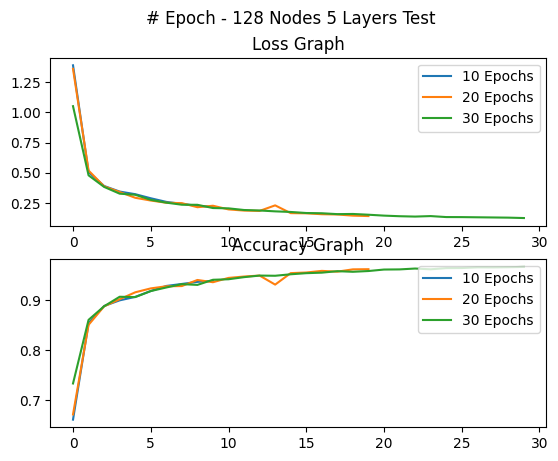

In [214]:
graph_accVloss([seq_0_e_hist, seq_1_e_hist, seq_2_e_hist], ["10 Epochs", "20 Epochs", "30 Epochs"], "# Epoch - 128 Nodes 5 Layers Test")

Comparing the # of Epochs, having more resulted in higher validation accuracy although all 3 are very close, we just have to be aware that having significantly more epochs could result in overfitting, in this case however it only seems to be a positive for the model

## **2. Tuning generalization**

In this question you will construct a neural network to classify a large set of low resolution images. Different from Q1, in this case we suggest a neural network to start experimenting with, but we would like you to describe the behavior of the network as you modify certain parameters. You will be reproducing some concepts mentioned during the lectures, such as when we show how generalization changes as the number of parameters are changed.

a) Use the CIFAR-100 dataset (available from Keras)

```python
from keras.datasets import cifar100
(x_train_original, y_train_original), (x_test_original, y_test_original) =
cifar100.load_data(label_mode='fine')
```
to train a neural network with two hidden layers using the logistic activation function, with 500 and 200 hidden nodes, respectively. The output layer should be defined according to the nature of the targets.

a) Generate a plot that shows average precision for training and test sets as a function of the number of epochs. Indicate what a reasonable number of epochs should be.

> Hint: Keras' `history` callback may be a helpful utility here.

In [126]:
from keras.datasets import cifar100

(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')
x_train_original, x_test_original = x_train_original / 255.0, x_test_original / 255.0

In [127]:
x_train_combined = np.append(x_train_original, x_test_original, axis=0)
y_train_combined = np.append(y_train_original, y_test_original)

indices = np.arange(x_train_combined.shape[0])
np.random.shuffle(indices)

x_train_combined = x_train_combined[indices]
y_train_combined = y_train_combined[indices]

size = x_train_combined.shape[0]
# sets
train_set_split = int(size * .7)
valid_set_split = int(size * .15)
test_set_split = int(size * .15)

x_train_set = x_train_combined[:train_set_split]
y_train_label = y_train_combined[:train_set_split]

x_valid_set = x_train_combined[train_set_split:valid_set_split + train_set_split]
y_valid_label = y_train_combined[train_set_split:valid_set_split + train_set_split]
#
x_test_set = x_train_combined[-test_set_split:]
y_test_label = y_train_combined[-test_set_split:]

In [128]:
import random
import matplotlib.pyplot as plt

def show_images(images, title_texts):
    cols = 5
    rows = int(len(images) / cols) + 1
    plt.figure(figsize=(15, 15))
    index = 1
    for x in zip(images, title_texts):
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)
        plt.imshow(image)
        if title_text != '':
            plt.title(title_text, fontsize=10)
        index += 1
    plt.ioff()
    plt.show()
#
# Show some random training and test images
#
def display_input(x_train, yl_train, x_test, yl_test):
    images_2_show = []
    titles_2_show = []
    for i in range(0, 10):
        r = random.randint(1, len(x_train))
        images_2_show.append(x_train[r])
        titles_2_show.append('training image [' + str(r) + '] = ' + str(yl_train[r]))

    for i in range(0, 5):
        r = random.randint(1, len(x_test))
        images_2_show.append(x_test[r])
        titles_2_show.append('test image [' + str(r) + '] = ' + str(yl_test[r]))

    show_images(images_2_show, titles_2_show)

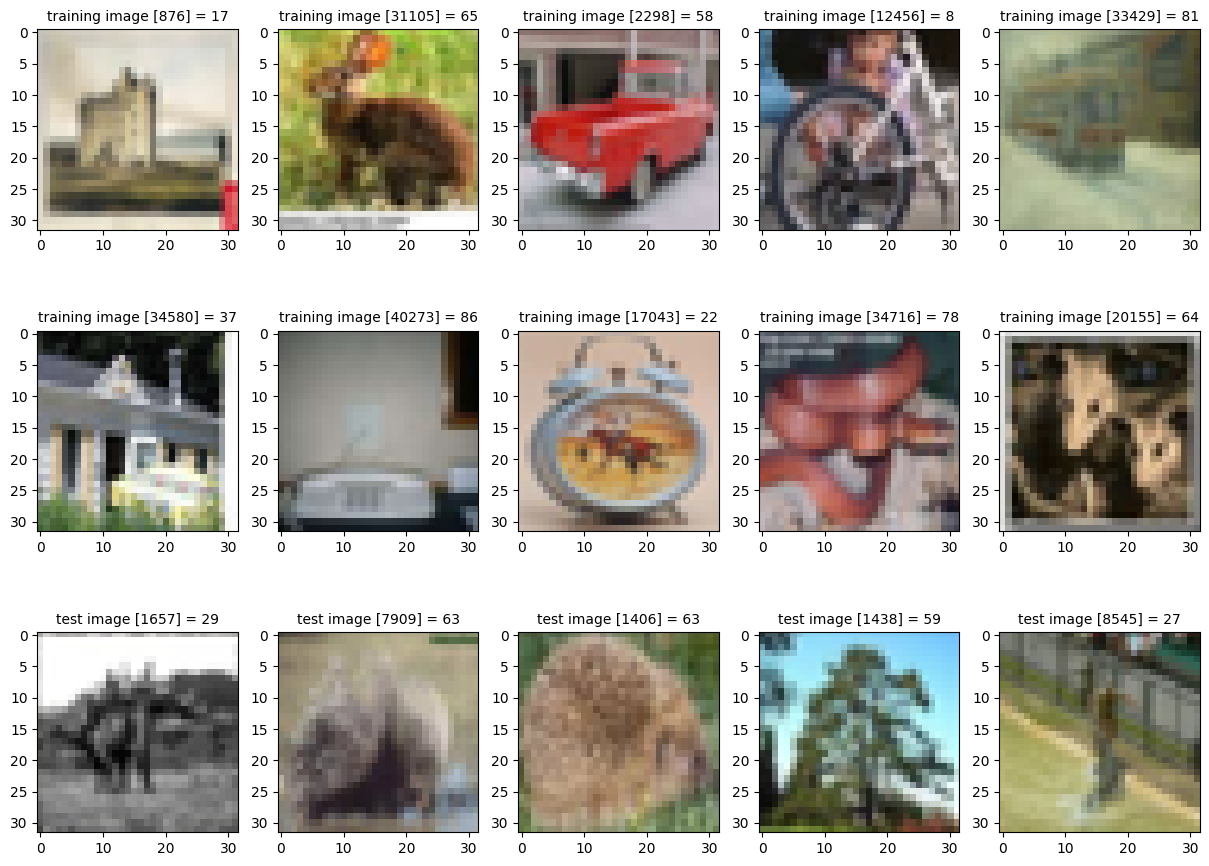

In [129]:
# Display some Images
display_input(x_train_set, y_train_label, x_test_set, y_test_label)

In [ ]:
# for sanity check, specify specific images to inspect
def display_img(x, y, index):
    plt.figure(figsize=(15, 15))
    image = x[index]
    plt.imshow(image)
    plt.ioff()
    plt.show()
    print(y[index])

display_img(x_train_set, y_train_label, 9144)

In [131]:
# your model code here
def model_cifar():
    model = keras.Sequential()
    model._name = "CIFAR-100-Sequential-Sigmoid"
    model.add(keras.Input(shape=(32,32,3)))
    model.add(layers.Flatten())
    model.add(layers.Dense(500, activation="sigmoid", name="dense_1"))
    model.add(layers.Dense(200, activation="sigmoid", name="dense_2"))
    model.add(layers.Dense(100, activation="softmax", name="output"))

    model.compile("SGD", "sparse_categorical_crossentropy", metrics=[keras.metrics.SparseCategoricalAccuracy()])
    return model

In [132]:
# train model
cifar_sigmoid = model_cifar()
csmodel_hist = cifar_sigmoid.fit(x = x_train_set, y = y_train_label, batch_size = 20, epochs = 500, validation_data = (x_valid_set, y_valid_label), shuffle = True)

Epoch 1/500
2100/2100 [==============================] - 10s 4ms/step - loss: 4.6078 - sparse_categorical_accuracy: 0.0127 - val_loss: 4.5853 - val_sparse_categorical_accuracy: 0.0217
Epoch 2/500
2100/2100 [==============================] - 8s 4ms/step - loss: 4.5644 - sparse_categorical_accuracy: 0.0252 - val_loss: 4.5423 - val_sparse_categorical_accuracy: 0.0418
Epoch 3/500
2100/2100 [==============================] - 8s 4ms/step - loss: 4.5039 - sparse_categorical_accuracy: 0.0436 - val_loss: 4.4571 - val_sparse_categorical_accuracy: 0.0501
Epoch 4/500
2100/2100 [==============================] - 8s 4ms/step - loss: 4.3953 - sparse_categorical_accuracy: 0.0555 - val_loss: 4.3369 - val_sparse_categorical_accuracy: 0.0579
Epoch 5/500
2100/2100 [==============================] - 8s 4ms/step - loss: 4.2732 - sparse_categorical_accuracy: 0.0628 - val_loss: 4.2247 - val_sparse_categorical_accuracy: 0.0696
Epoch 6/500
2100/2100 [==============================] - 8s 4ms/step - loss: 4.1816 

In [134]:
# Summary of cifar_sigmoid model
cifar_sigmoid.summary()

Model: "CIFAR-100-Sequential-Sigmoid"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_24 (Flatten)        (None, 3072)              0         
                                                                 
 dense_1 (Dense)             (None, 500)               1536500   
                                                                 
 dense_2 (Dense)             (None, 200)               100200    
                                                                 
 output (Dense)              (None, 100)               20100     
                                                                 
Total params: 1656800 (6.32 MB)
Trainable params: 1656800 (6.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [135]:
#save model for testing
cifar_sigmoid.save("C:\\Users\\MarkJ\\Downloads\\ml-models-state", overwrite=True)

INFO:tensorflow:Assets written to: C:\Users\MarkJ\Downloads\ml-models-state\assets


INFO:tensorflow:Assets written to: C:\Users\MarkJ\Downloads\ml-models-state\assets


dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


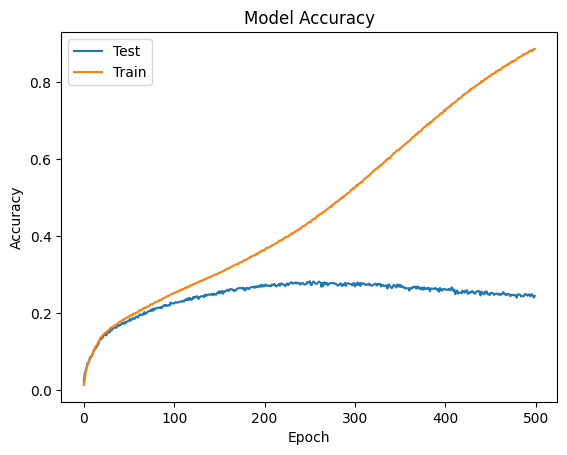

In [216]:
import matplotlib.pyplot as plt
from keras.callbacks import History
history = History()

print(csmodel_hist.history.keys())
# your plotting code here
plt.plot(csmodel_hist.history['val_sparse_categorical_accuracy'])
plt.plot(csmodel_hist.history['sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='upper left')
plt.show()

The training accuracy increases the higher the epoch which is expected, the testing accuracy starts dropping around the 250 range because the model starts suffering from overfitting. The best testing accuracy I could get was ~23%, this is a problem with not using a CNN for images.

b) Generate a plot that shows average precision for training and test sets as a function of the number of weights/parameters (# hidden nodes). For this part, you will be modifying the architecture that was given to you as a starting point.

In [21]:
# your code here
# graph is accuracy vs weights/parameters

c) Generate a plot that shows average precision for training and test sets as a function of the number of instances in the training set. For this part, you will be modifying your training set. For instance, you can run 10 experiments where you first use a random 10% of the training data, a second experiment where you use a random 20% of the training data, and so on until
you use the entire training set. Keep the network hyperparameters constant during your experiments.

In [220]:
def train_var(training_set, label_set, train_size):
    index = np.arange(training_set.shape[0])
    np.random.shuffle(index)

    train_shuffled = training_set[index]
    label_shuffled = label_set[index]

    size_train = train_shuffled.shape[0]
    # sets
    training_set_new = int(size_train * train_size)

    train_set_shuffle = train_shuffled[:training_set_new]
    label_set_shuffle = label_shuffled[:training_set_new]

    return train_set_shuffle, label_set_shuffle

In [223]:
# your code here
# 10% of training data
(train_10, label_10) = train_var(x_train_set, y_train_label, .10)
cifar_model = model_cifar()
t10 = cifar_model.fit(x = train_10, y = label_10, batch_size = 28, epochs = 100, validation_data = (x_valid_set, y_valid_label), shuffle = True)
# 20% of training data
(train_20, label_20) = train_var(x_train_set, y_train_label, .20)
cifar_model = model_cifar()
t20 = cifar_model.fit(x = train_20, y = label_20, batch_size = 28, epochs = 100, validation_data = (x_valid_set, y_valid_label), shuffle = True)
# 30% of training data
(train_30, label_30) = train_var(x_train_set, y_train_label, .30)
cifar_model = model_cifar()
t30 = cifar_model.fit(x = train_30, y = label_30, batch_size = 28, epochs = 100, validation_data = (x_valid_set, y_valid_label), shuffle = True)
# 40% of training data
(train_40, label_40) = train_var(x_train_set, y_train_label, .40)
cifar_model = model_cifar()
t40 = cifar_model.fit(x = train_40, y = label_40, batch_size = 28, epochs = 100, validation_data = (x_valid_set, y_valid_label), shuffle = True)
# 50% of training data
(train_50, label_50) = train_var(x_train_set, y_train_label, .50)
cifar_model = model_cifar()
t50 = cifar_model.fit(x = train_50, y = label_50, batch_size = 28, epochs = 100, validation_data = (x_valid_set, y_valid_label), shuffle = True)
# 60% of training data
(train_60, label_60) = train_var(x_train_set, y_train_label, .60)
cifar_model = model_cifar()
t60 = cifar_model.fit(x = train_60, y = label_60, batch_size = 28, epochs = 100, validation_data = (x_valid_set, y_valid_label), shuffle = True)
# 70% of training data
(train_70, label_70) = train_var(x_train_set, y_train_label, .70)
cifar_model = model_cifar()
t70 = cifar_model.fit(x = train_70, y = label_70, batch_size = 28, epochs = 100, validation_data = (x_valid_set, y_valid_label), shuffle = True)
# 80% of training data
(train_80, label_80) = train_var(x_train_set, y_train_label, .80)
cifar_model = model_cifar()
t80 = cifar_model.fit(x = train_80, y = label_80, batch_size = 28, epochs = 100, validation_data = (x_valid_set, y_valid_label), shuffle = True)
# 90% of training data
(train_90, label_90) = train_var(x_train_set, y_train_label, .90)
cifar_model = model_cifar()
t90 = cifar_model.fit(x = train_90, y = label_90, batch_size = 28, epochs = 100, validation_data = (x_valid_set, y_valid_label), shuffle = True)
# 100% of training data
(train_100, label_100) = train_var(x_train_set, y_train_label, 1)
cifar_model = model_cifar()
t100 = cifar_model.fit(x = train_100, y = label_100, batch_size = 28, epochs = 100, validation_data = (x_valid_set, y_valid_label), shuffle = True)

Epoch 1/100
150/150 [==============================] - 2s 10ms/step - loss: 4.6730 - sparse_categorical_accuracy: 0.0114 - val_loss: 4.6342 - val_sparse_categorical_accuracy: 0.0131
Epoch 2/100
150/150 [==============================] - 1s 6ms/step - loss: 4.6117 - sparse_categorical_accuracy: 0.0145 - val_loss: 4.6169 - val_sparse_categorical_accuracy: 0.0126
Epoch 3/100
150/150 [==============================] - 1s 6ms/step - loss: 4.5992 - sparse_categorical_accuracy: 0.0121 - val_loss: 4.6131 - val_sparse_categorical_accuracy: 0.0130
Epoch 4/100
150/150 [==============================] - 1s 6ms/step - loss: 4.5945 - sparse_categorical_accuracy: 0.0143 - val_loss: 4.6108 - val_sparse_categorical_accuracy: 0.0106
Epoch 5/100
150/150 [==============================] - 1s 6ms/step - loss: 4.5921 - sparse_categorical_accuracy: 0.0136 - val_loss: 4.6087 - val_sparse_categorical_accuracy: 0.0140
Epoch 6/100
150/150 [==============================] - 1s 6ms/step - loss: 4.5892 - sparse_cat

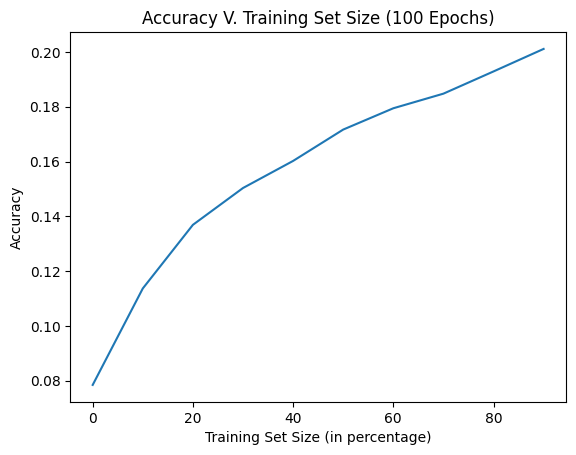

In [242]:
models = [t10, t20, t30, t40, t50, t60, t70, t80, t90, t100]
final_acc = [i.history['val_sparse_categorical_accuracy'][-1] for i in models]

plt.plot(range(0, 100, 10), final_acc)
plt.title("Accuracy V. Training Set Size (100 Epochs)")
plt.ylabel("Accuracy")
plt.xlabel("Training Set Size (in percentage)")
plt.show()

I only did 100 Epochs because it already took an hour to train this model.

Anyway there is a clear connection where the more training data we expose the model to the higher its accuracy is, but there is also something else going on. Because we aren't using a CNN our model is generalizing really badly with the test set, the model is therefore very reliant on seeing more data to improve its accuracy, but it doesn't mean that it's going to do well generally since there is some inherent 'orientation' & position its expecting the data to be in (based on the stuff it has seen before) if it at all deviates from that even though it's still the same data it will most likely make the wrong prediction. This is why we need a CNN which gets around that problem by convolution.

d) Define the best network architecture from your experiments above and report the accuracy and average precision for all classes.



In [288]:
# your code here

# I am assuming we still need to use a non-convolutional model
def new_model():
    model = keras.Sequential()
    model._name = "CIFAR-100-Sequential-Sigmoid"
    model.add(keras.Input(shape=(32,32,3)))
    model.add(layers.Flatten())
    model.add(layers.Dense(500, activation="sigmoid", name="dense_1"))
    model.add(layers.Dense(200, activation="sigmoid", name="dense_2"))
    model.add(layers.Dense(100, activation="softmax", name="output"))

    model.compile("SGD", "sparse_categorical_crossentropy", metrics=[keras.metrics.SparseCategoricalAccuracy()])
    return model

In [ ]:
model_ = new_model()

nn_cifar = model_.fit(x = x_train_set, y = y_train_label, batch_size = 128, epochs = 250, validation_data = (x_valid_set, y_valid_label), shuffle = True)

Epoch 1/250
329/329 [==============================] - 2s 6ms/step - loss: 4.6439 - sparse_categorical_accuracy: 0.0099 - val_loss: 4.6069 - val_sparse_categorical_accuracy: 0.0102
Epoch 2/250
329/329 [==============================] - 2s 6ms/step - loss: 4.6018 - sparse_categorical_accuracy: 0.0144 - val_loss: 4.6005 - val_sparse_categorical_accuracy: 0.0120
Epoch 3/250
329/329 [==============================] - 2s 6ms/step - loss: 4.5964 - sparse_categorical_accuracy: 0.0156 - val_loss: 4.5953 - val_sparse_categorical_accuracy: 0.0170
Epoch 4/250
329/329 [==============================] - 2s 7ms/step - loss: 4.5918 - sparse_categorical_accuracy: 0.0210 - val_loss: 4.5906 - val_sparse_categorical_accuracy: 0.0220
Epoch 5/250
329/329 [==============================] - 2s 6ms/step - loss: 4.5871 - sparse_categorical_accuracy: 0.0249 - val_loss: 4.5868 - val_sparse_categorical_accuracy: 0.0242
Epoch 6/250
329/329 [==============================] - 2s 6ms/step - loss: 4.5824 - sparse_cate

e) Can you improve test prediction performance by using an ensemble of neural networks? Explain with words (don't implement!)

Somewhat yes, we can train an ensemble of networks assuming we are required to use sequential models still. Each model in the ensemble can do a prediction and we take the most common prediction as a result. However, it is better to just use and train a single CNN than an ensemble of standard NN's.